In [4]:
%matplotlib inline
import matplotlib
#create empty arrays for capex and opex of each product
capex1 = []
opex1 = []
capex2 = []
opex2 = []
capex3 = []
opex3 = []
#calculate product A
def prA(user,cpu):
    capex = 0
    opex = 0
    hw = 5000*cpu
    capex = capex + 2*hw #twice because both disaster and production site's should be considered.
    hw_m = (hw/10)*4
    opex = opex + 2*hw_m
    hw = 2*(hw + hw_m)
    a1 = 100*user
    a2 = 150*user
    a3 = 300*user
    a4 = 5000*cpu
    a5 = 4000*cpu
    a6 = 3000*cpu
    license_1 = a1 + a2 + a3 + a4 + a5 + a6 #total license of the sub-products
    capex = capex + license_1
    disaster_site = (a4+a5+a6)*30/100
    capex = capex + disaster_site
    maintenance_fee = ((license_1 + disaster_site)*18)/100
    maintenance_fee = maintenance_fee*4 #starting second year to year 5
    opex = opex + maintenance_fee
    customization = 200000
    capex = capex + customization
    customization_m = 120000 #15% maintenance of 200000 for four years
    opex = opex + customization_m
    TCO = customization_m+customization+maintenance_fee+disaster_site+license_1+hw
    capex1.append(capex)
    opex1.append(opex)
    return TCO #returns the tco of given users
#calculate product B
def prB(user):
    capex = 0
    opex = 0
    license_2 = user*350
    capex = capex + license_2
    subscription = 300*user*5 #starting from the first year
    opex = opex + subscription
    TCO = license_2 + subscription
    capex2.append(capex)
    opex2.append(opex)
    return TCO #returns tco of given users
#calculate product C
def prC(user,cpu):
    capex = 0
    opex = 0
    hw = 5000*cpu
    capex = capex + 2*hw
    hw_m = (hw/10)*4
    opex = opex + 2*hw_m
    hw = 2*(hw + hw_m)
    subscription = 25000*cpu*5
    opex = opex + subscription
    customization = 500000
    capex = capex + customization
    TCO = customization + subscription + hw
    capex3.append(capex)
    opex3.append(opex)
    return TCO #return tco of given users

In [5]:
import numpy as np
cpuA = []
cpuC = []
A = []
B = []
C = []
#allocate cpus to users based on the product
for user in np.arange (100,1001,50):
    if user < 301:
        cpuA.append(2)
    if user < 401:
        cpuC.append(2)
    if user > 301 and user < 601:
        cpuA.append(4)
    if user > 401 and user < 601:
        cpuC.append(6)
    if user > 601 and user < 1001:
        cpuA.append(8)
        cpuC.append(8)
x = []
counter = 0
#call the functions for users 100 to 1000
for user in np.arange(100,1001,50):
    x.append(user)
    A.append(prA(user,cpuA[counter]))
    B.append(prB(user))
    C.append(prC(user,cpuC[counter]))
    counter = counter + 1
#capex,opex and tco of each product, assuming 300 users
print(capex1[4],opex1[4],A[4])
print(capex2[4],opex2[4],B[4])
print(capex3[4],opex3[4],C[4])

416200.0 269264.0 685464.0
105000 450000 555000
520000 258000.0 778000.0


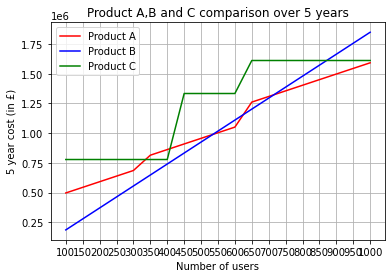

In [6]:
#plot the line graph
import matplotlib.pyplot as plt
plA = plt.plot(x,A,color='r',label = 'Product A')
plB = plt.plot(x,B,color='b',label = 'Product B')
plC = plt.plot(x,C,color='g',label = 'Product C')
plt.xlabel('Number of users')
plt.ylabel('5 year cost (in £)')
plt.xticks(x,x)
plt.title('Product A,B and C comparison over 5 years')
plt.grid(True)
plt.legend()
plt.show()